Use `word2vec` embeddings as text representation.

# Reading Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
labelled_data = pd.read_csv('./data/rotten_tomatoes_20190814.csv', 
                            index_col=0,header=0, 
                            encoding = "utf8")
labelled_data.head(2)

,text,Action and Adventure,Animation,Anime and Manga,Art House and International,Classics,Comedy,Cult Movies,Documentary,Drama,...,Musical and Performing Arts,Mystery and Suspense,Romance,Science Fiction and Fantasy,Special Interest,Sports and Fitness,Television,Western,fresh,rotten
0,A distinctly gallows take on contemporary fina...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0
1,It's an allegory in search of a meaning that n...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1


In [3]:
labelled_data.shape

(48755, 24)

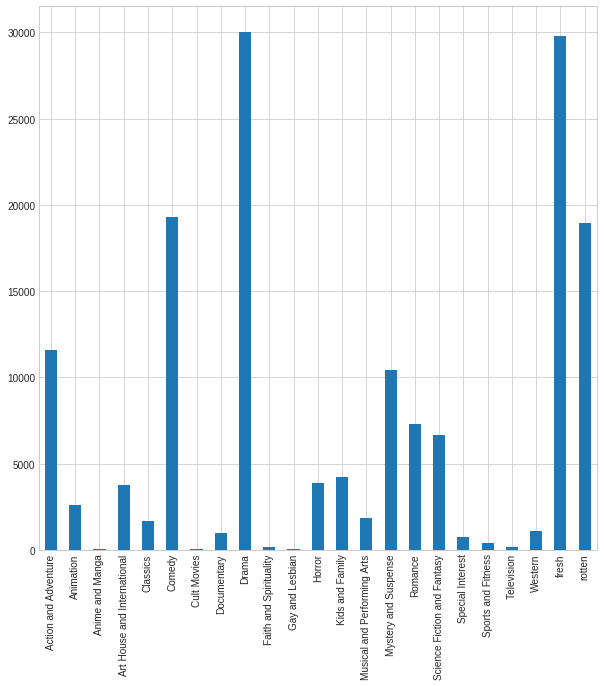

In [4]:
plt.figure(figsize=(10, 10))
labelled_data.iloc[:, 1:].sum(axis = 0, skipna = True).plot(kind='bar')

In [11]:
labels = (labelled_data.iloc[:, 1:].sum(axis = 0, skipna = True) > 1659)

In [12]:
filtered_labels = labels.index[labels == False].tolist()

In [13]:
filtered = labelled_data[filtered_labels]
filtered.head(2)

,Anime and Manga,Classics,Cult Movies,Documentary,Faith and Spirituality,Gay and Lesbian,Special Interest,Sports and Fitness,Television,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
filtered['Sum'] = filtered.sum(axis=1)

/home/tao/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
def my_label(row):
    if row['Sum'] > 0:
        return 1
    else:
        return 0

In [16]:
filtered['Other'] = filtered.apply(lambda row: my_label(row), axis=1)

/home/tao/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
keep = labelled_data.drop(filtered_labels, axis=1)
keep.head(2)

,text,Action and Adventure,Animation,Art House and International,Comedy,Drama,Horror,Kids and Family,Musical and Performing Arts,Mystery and Suspense,Romance,Science Fiction and Fantasy,fresh,rotten
0,A distinctly gallows take on contemporary fina...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0
1,It's an allegory in search of a meaning that n...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1


In [18]:
data = pd.concat([keep, filtered['Other']], axis=1)
data.head(2)

,text,Action and Adventure,Animation,Art House and International,Comedy,Drama,Horror,Kids and Family,Musical and Performing Arts,Mystery and Suspense,Romance,Science Fiction and Fantasy,fresh,rotten,Other
0,A distinctly gallows take on contemporary fina...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0
1,It's an allegory in search of a meaning that n...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0


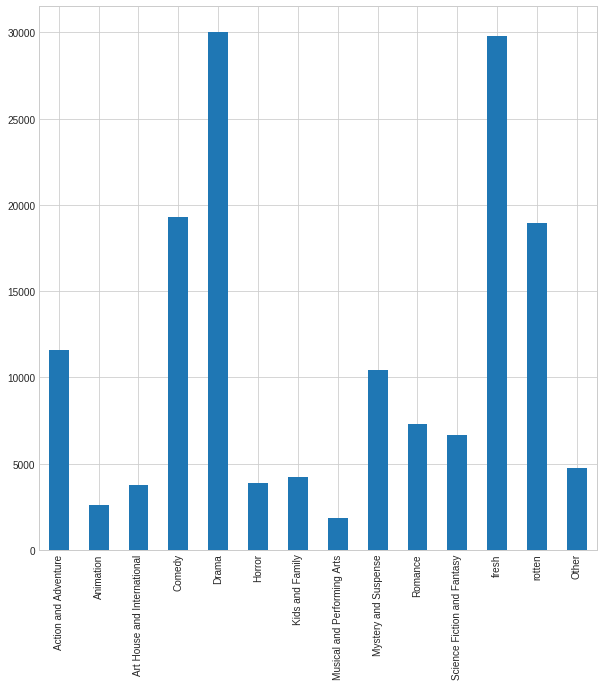

In [19]:
plt.figure(figsize=(10, 10))
data.iloc[:, 1:].sum(axis = 0, skipna = True).plot(kind='bar')

In [20]:
data.to_csv('./data/rotten_tomatoes_20200726.csv')

In [21]:
y_df = data.iloc[:, 1:]

In [22]:
tags = list(y_df.columns)
tags

['Action and Adventure',
 'Animation',
 'Art House and International',
 'Comedy',
 'Drama',
 'Horror',
 'Kids and Family',
 'Musical and Performing Arts',
 'Mystery and Suspense',
 'Romance',
 'Science Fiction and Fantasy',
 'fresh',
 'rotten',
 'Other']

In [23]:
Y = y_df.values
Y[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.]])

# Text Preprocessing

In [24]:
import textacy
#import en_core_web_sm
nlp = textacy.load_spacy_lang("en_core_web_md")

import re

## Identify NERs

In [25]:
def ner_replace(text):
    doc = textacy.make_spacy_doc(text,lang=nlp)
    entities={}
    for i in doc.ents:
        entities[str(i)] = i.label_
    new_doc = doc.text
    for k in sorted(entities.keys(), key = len, reverse = True):
        new_doc = new_doc.replace(k, entities[k])
    return(new_doc)

## Identify MWPs

In [26]:
import textacy.ke
def np_replace(text):
    doc = textacy.make_spacy_doc(text,lang=nlp)
    chunk_lst = [t[0] for t in (textacy.ke.textrank(doc, normalize="lemma", topn=10)) if (len(t[0]) > 1)]
    replace_lst = ['_'.join(t.split()) for t in chunk_lst]

    replace_dict = dict(zip(chunk_lst, replace_lst))

    new_doc = doc.text
    for k in sorted(replace_dict.keys(), key = len, reverse = True):
        new_doc = new_doc.replace(k, replace_dict[k])
    return(new_doc)

/home/tao/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, defaultdict


## Clean Text
- Remove HTML tags
- Remove Punctuation
- Remove Non-alph tokens

In [27]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings
#data = sent_df1
if not sys.warnoptions:
    warnings.simplefilter("ignore")
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [28]:
review_text = data.text

review_text = review_text.str.lower()

review_text = review_text.apply(cleanHtml)
review_text = review_text.apply(cleanPunc)
review_text = review_text.apply(ner_replace)
review_text = review_text.apply(np_replace)
review_text = review_text.apply(keepAlpha)

## Remove Stopwords

In [29]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six',
                   'seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

In [30]:
review_text = review_text.apply(removeStopWords)

## Stemming

In [31]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

In [32]:
review_text = review_text.apply(stemming)

In [33]:
review_text.head(2)

0    distinct gallow take contemporari financi more...
1    allegori search mean never arriv old fashicard...
Name: text, dtype: object

In [34]:
review_text.apply(len).max()

579

In [35]:
from sklearn.model_selection import train_test_split
text_train, text_test, y_train, y_test = train_test_split(review_text, Y, test_size=0.2, 
                                                    random_state=2020)

# Modeling

With keras `embedding` layer

In [36]:
import tensorflow as tf
from tensorflow.keras.preprocessing import text
import keras.backend.tensorflow_backend as K
K.set_session

Using TensorFlow backend.


<function keras.backend.tensorflow_backend.set_session(session)>

In [37]:
# model setup
# EMBED_DIM = 150
# VOCAB_SIZE = 3000
# MAX_LENGTH = review_text.apply(len).max()

In [38]:
num_tags = y_df.shape[1]
num_tags

14

In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(review_text)

In [40]:
VOCAB_SIZE = len(tokenizer.word_index) + 1 #19793
EMBED_DIM = 150
MAX_LENGTH = review_text.apply(len).max()

In [41]:
X_train = tokenizer.texts_to_sequences(text_train)
X_test = tokenizer.texts_to_sequences(text_test)

X_train_pad = pad_sequences(X_train, maxlen=MAX_LENGTH, padding = 'post')
X_test_pad = pad_sequences(X_test, maxlen=MAX_LENGTH, padding = 'post')

X_train_pad.shape, X_test_pad.shape

((39004, 579), (9751, 579))

In [42]:
X_train_pad[0,:]

array([2228,   95,   47, 2061,  336,   15,  187,  215, 2050, 5650,  142,
         41, 5151,  515,  294, 1813, 2731,  199,   39,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, GRU, Bidirectional,Flatten

In [44]:
model = Sequential()
model.add(Embedding(input_dim=VOCAB_SIZE, output_dim=EMBED_DIM, input_length=MAX_LENGTH))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(num_tags, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 579, 150)          2968950   
_________________________________________________________________
flatten (Flatten)            (None, 86850)             0         
_________________________________________________________________
dense (Dense)                (None, 50)                4342550   
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_2 (Dense)              (None, 14)                364       
Total params: 7,313,139
Trainable params: 7,313,139
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.fit(X_train_pad, y_train, epochs = 5, batch_size=128, validation_split=0.1)
print('Eval loss/accuracy:{}'.format(model.evaluate(X_test_pad, y_test, batch_size = 128)))

Train on 35103 samples, validate on 3901 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
35103/35103 [==============================] - 3s 98us/sample - loss: 0.3250 - acc: 0.8525 - val_loss: 0.1624 - val_acc: 0.9380
Epoch 2/5
35103/35103 [==============================] - 3s 84us/sample - loss: 0.1222 - acc: 0.9536 - val_loss: 0.0990 - val_acc: 0.9608
Epoch 3/5
35103/35103 [==============================] - 3s 84us/sample - loss: 0.0745 - acc: 0.9726 - val_loss: 0.0880 - val_acc: 0.9637
Epoch 4/5
35103/35103 [==============================] - 3s 86us/sample - loss: 0.0478 - acc: 0.9834 - val_loss: 0.0929 - val_acc: 0.9646
Epoch 5/5
9751/9751 [==============================] - 0s 19us/sample - loss: 0.1100 - acc: 0.9632
Eval loss/accuracy:[0.11002543404256732, 0.96324915]


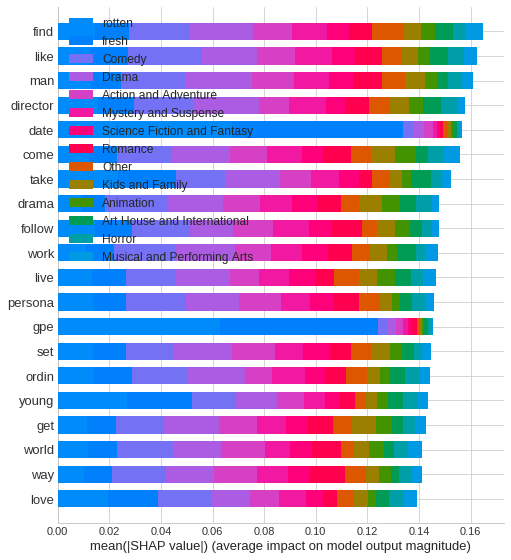

In [49]:
import shap
import numpy as np

attrib_data = X_train_pad[:1000]
explainer = shap.DeepExplainer(model, attrib_data)
num_explanations = 50
shap_vals = explainer.shap_values(X_test_pad[:num_explanations])
num2word = dict()
for w in tokenizer.word_index.keys():
    num2word[tokenizer.word_index[w]] = w
x_test_words = np.stack([np.array(list(map(lambda x: num2word.get(x, "NONE"), X_test_pad[i]))) for i in range(50)])
shap.summary_plot(shap_vals, class_names=y_df.columns, feature_names=list(num2word.values()))

Action and Adventure


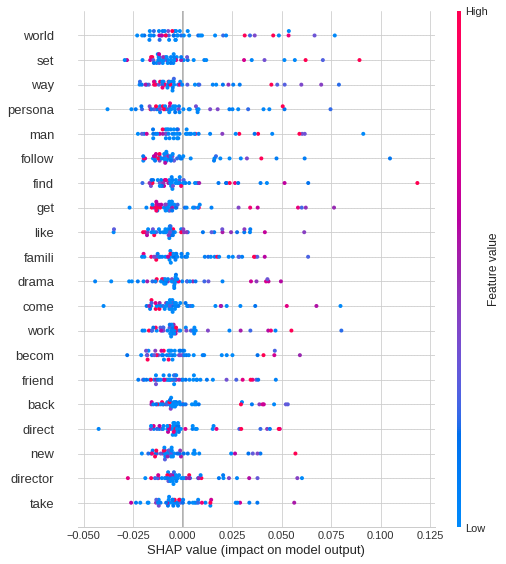

Animation


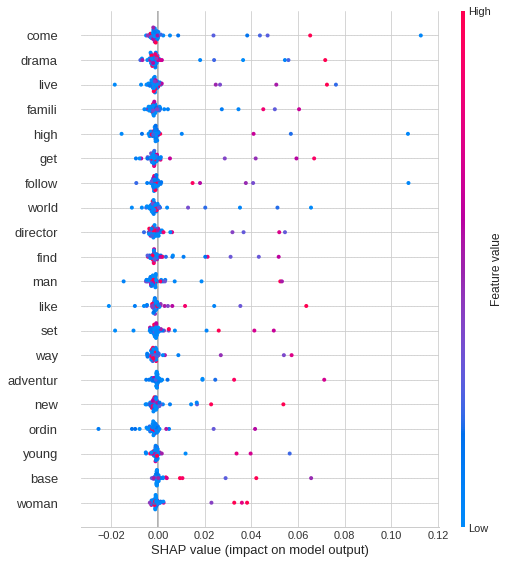

Art House and International


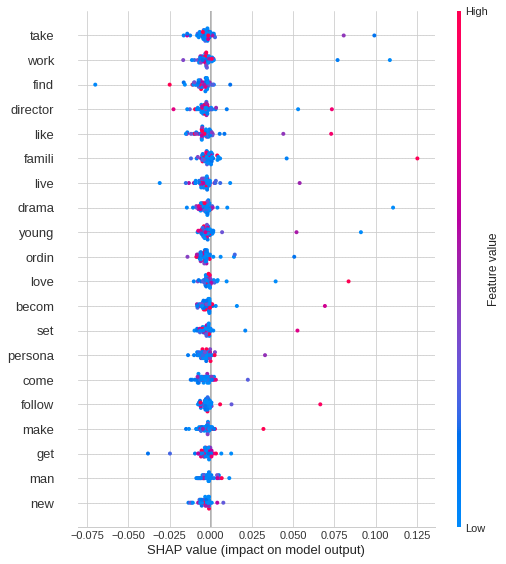

Comedy


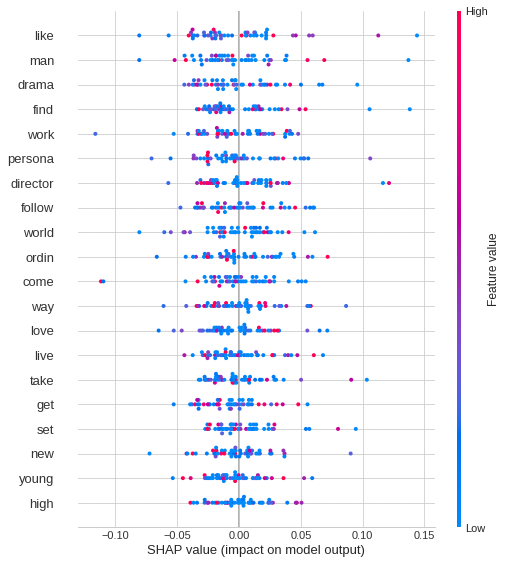

Drama


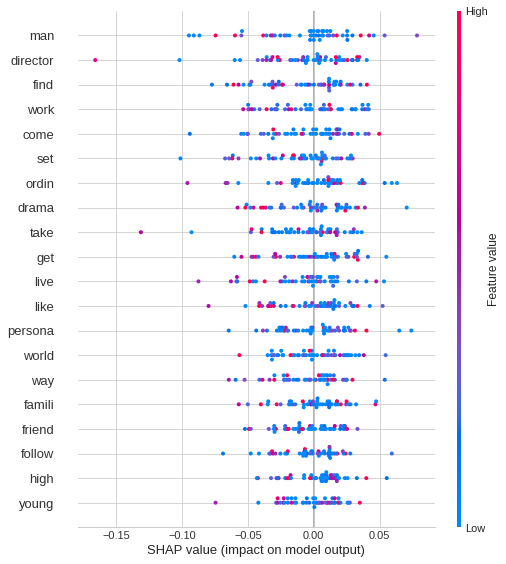

Horror


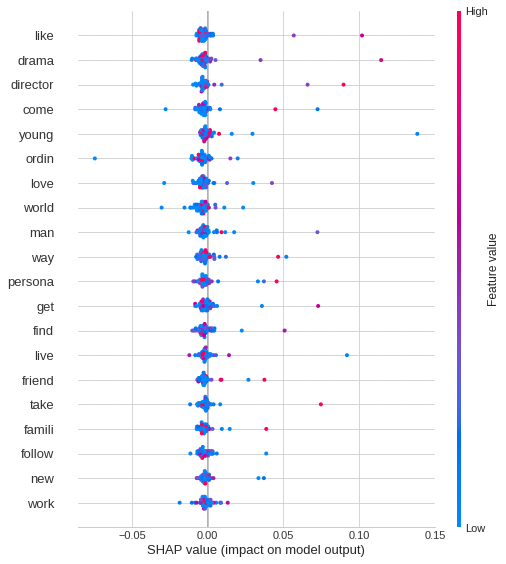

Kids and Family


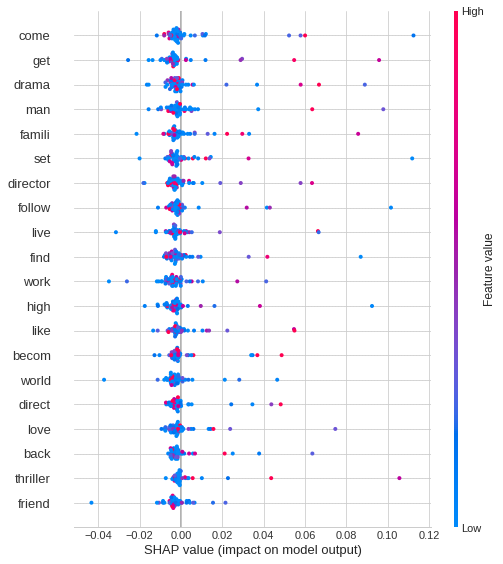

Musical and Performing Arts


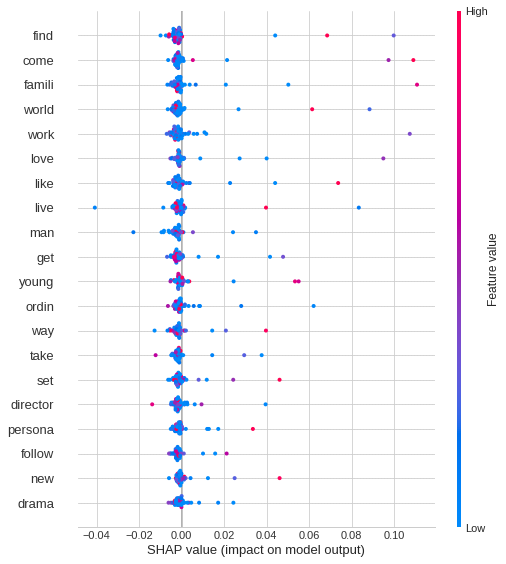

Mystery and Suspense


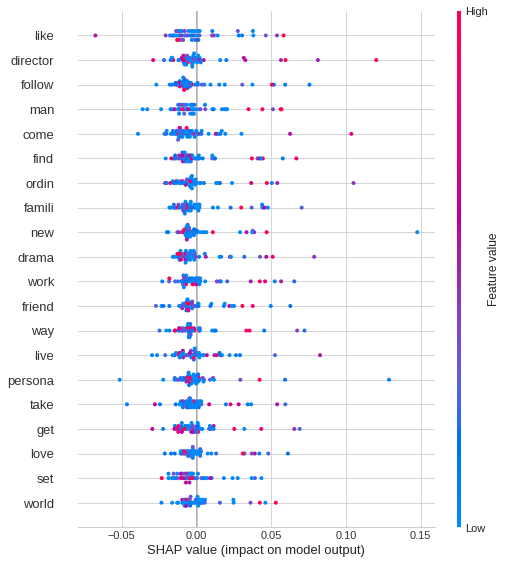

Romance


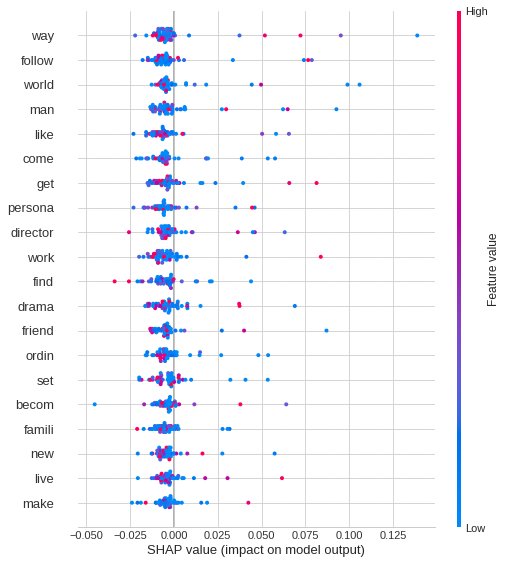

Science Fiction and Fantasy


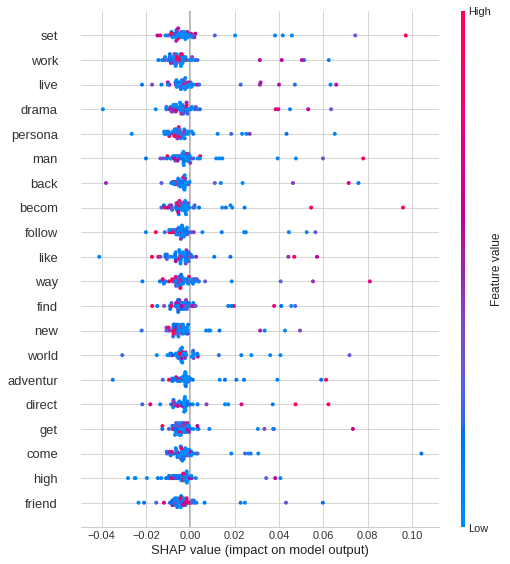

fresh


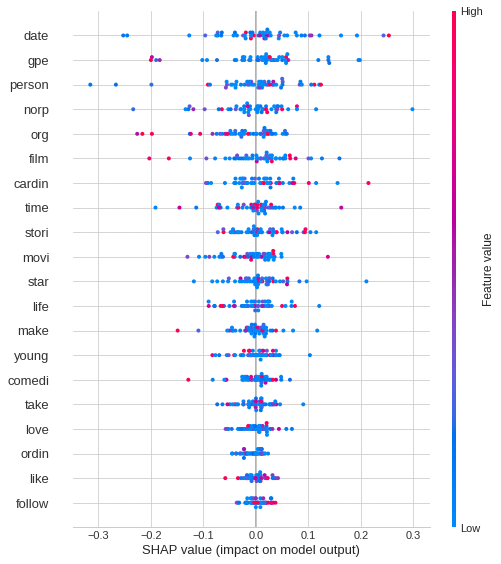

rotten


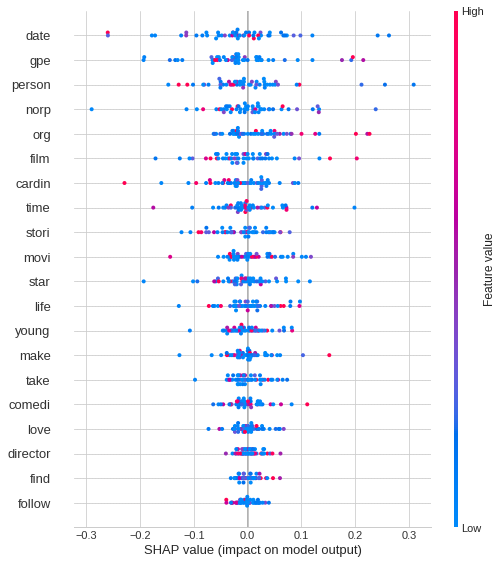

Other


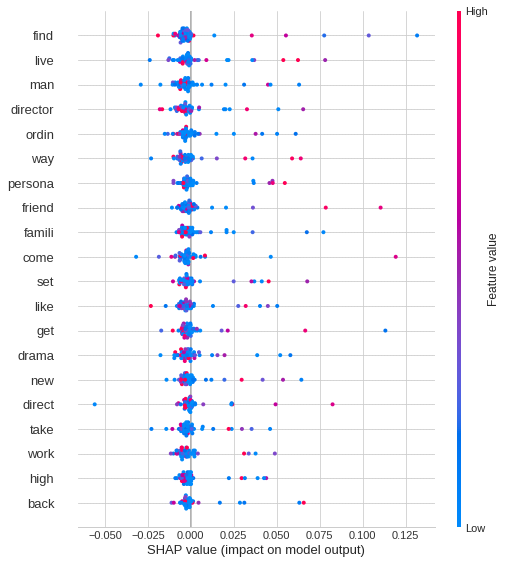

In [50]:
for i in range(14):
    print(y_df.columns[i])
    shap.summary_plot(shap_vals[i], X_test_pad[:num_explanations], feature_names=list(num2word.values()))

In [52]:
# init the JS visualization code
shap.initjs()
# create dict to invert word_idx k,v order
num2word = {}
for w in tokenizer.word_index.keys():
    num2word[tokenizer.word_index[w]] = w
x_test_words = np.stack([np.array(list(map(lambda x: num2word.get(x, "NONE"), X_test_pad[i]))) for i in range(10)])

# plot the explanation of a given prediction
class_num = 0
input_num = 5
print(tags[0])
shap.force_plot(explainer.expected_value[class_num], shap_vals[class_num][input_num], x_test_words[input_num])

Action and Adventure


In [53]:
class_num = 1
input_num = 5
print(tags[1])
shap.force_plot(explainer.expected_value[class_num], shap_vals[class_num][input_num], x_test_words[input_num])

Animation


In [54]:
class_num = 2
input_num = 5
print(tags[2])
shap.force_plot(explainer.expected_value[class_num], shap_vals[class_num][input_num], x_test_words[input_num])

Art House and International


In [55]:
class_num = 3
input_num = 5
print(tags[3])
shap.force_plot(explainer.expected_value[class_num], shap_vals[class_num][input_num], x_test_words[input_num])

Comedy


In [56]:
class_num = 4
input_num = 5
print(tags[4])
shap.force_plot(explainer.expected_value[class_num], shap_vals[class_num][input_num], x_test_words[input_num])

Drama


In [57]:
class_num = 5
input_num = 5
print(tags[5])
shap.force_plot(explainer.expected_value[class_num], shap_vals[class_num][input_num], x_test_words[input_num])

Horror


In [58]:
class_num = 6
input_num = 5
print(tags[6])
shap.force_plot(explainer.expected_value[class_num], shap_vals[class_num][input_num], x_test_words[input_num])

Kids and Family


In [59]:
class_num = 7
input_num = 5
print(tags[7])
shap.force_plot(explainer.expected_value[class_num], shap_vals[class_num][input_num], x_test_words[input_num])

Musical and Performing Arts


In [60]:
class_num = 8
input_num = 5
print(tags[8])
shap.force_plot(explainer.expected_value[class_num], shap_vals[class_num][input_num], x_test_words[input_num])

Mystery and Suspense


In [61]:
class_num = 9
input_num = 5
print(tags[9])
shap.force_plot(explainer.expected_value[class_num], shap_vals[class_num][input_num], x_test_words[input_num])

Romance


In [62]:
class_num = 10
input_num = 5
print(tags[10])
shap.force_plot(explainer.expected_value[class_num], shap_vals[class_num][input_num], x_test_words[input_num])

Science Fiction and Fantasy


In [63]:
class_num = 11
input_num = 5
print(tags[11])
shap.force_plot(explainer.expected_value[class_num], shap_vals[class_num][input_num], x_test_words[input_num])

fresh


In [64]:
class_num = 12
input_num = 5
print(tags[12])
shap.force_plot(explainer.expected_value[class_num], shap_vals[class_num][input_num], x_test_words[input_num])

rotten


In [65]:
class_num = 13
input_num = 5
print(tags[13])
shap.force_plot(explainer.expected_value[class_num], shap_vals[class_num][input_num], x_test_words[input_num])

Other


In [66]:
# or access the embedding layer through the constructed model 
# first `0` refers to the position of embedding layer in the `model`
embeddings = model.layers[0].get_weights()[0]

In [67]:
type(embeddings)

numpy.ndarray

In [68]:
embeddings.shape

(19793, 150)

In [69]:
len(tokenizer.word_index)


19792

In [70]:
embeddings[0]

array([-2.2710864e-03, -2.0920110e-03,  7.1128597e-05,  2.3789681e-02,
       -5.6425288e-02, -8.6423545e-04, -2.1578947e-02, -6.1617196e-03,
        2.7372584e-02, -1.8464952e-03,  2.5330113e-02,  5.6784946e-02,
       -1.0606588e-03,  1.5092114e-02, -1.0719124e-02,  1.6494514e-02,
        1.6639493e-02, -2.2338023e-03,  3.4197714e-02, -5.3452689e-04,
        2.2103041e-02, -1.0366908e-03,  3.0727345e-03,  2.6798213e-03,
        2.3355854e-03, -1.9408988e-02,  3.6809100e-03, -1.3587636e-02,
        2.5829349e-02, -2.3395061e-02,  3.3597000e-02, -8.4523030e-04,
        4.5891823e-03,  2.1108675e-03, -8.0978386e-03,  1.2050120e-02,
       -1.7373379e-02, -2.6270218e-02, -8.0386857e-03, -9.9350112e-03,
       -1.8117281e-03,  4.6576522e-02,  8.9386469e-03, -4.1109705e-03,
        2.6742562e-03, -1.0714957e-03, -5.8133114e-04,  1.9045717e-04,
       -1.7167252e-02,  1.9978099e-02,  3.8548971e-03,  6.7103662e-02,
        2.9925799e-02,  5.3561530e-03,  2.9168841e-03, -2.7309211e-02,
      

# Word Embedding Explainer

Following code from [kaggle](https://www.kaggle.com/patricia92fa/explaining-cnns-for-text-classification-using-shap).

In [71]:
import keras.backend.tensorflow_backend as K
session = K.get_session()

In [72]:
# select a set of samples to take an expectation over
distrib_samples = X_train_pad[:1000]
#session = K.get_session()
# session had to be manually specified
# otherwise looked for Keras.._SESSION ct. which doesn't exist!
explainer = shap.DeepExplainer(model, distrib_samples)
num_explanations = 50

In [73]:
shap_values = explainer.shap_values(X_test_pad[:num_explanations])

In [74]:
# import numpy as np

In [75]:
num2word = {}
for w in tokenizer.word_index.keys():
    num2word[tokenizer.word_index[w]] = w
x_test_words = np.stack([np.array(list(map(lambda x: num2word.get(x, "NONE"), X_test_pad[i]))) for i in range(10)])

In [76]:
num2word

{1: 'person',
 2: 'date',
 3: 'gpe',
 4: 'cardin',
 5: 'film',
 6: 'norp',
 7: 'org',
 8: 'stori',
 9: 'time',
 10: 'movi',
 11: 'star',
 12: 'life',
 13: 'comedi',
 14: 'young',
 15: 'make',
 16: 'love',
 17: 'take',
 18: 'director',
 19: 'world',
 20: 'find',
 21: 'ordin',
 22: 'live',
 23: 'man',
 24: 'come',
 25: 'drama',
 26: 'like',
 27: 'work',
 28: 'famili',
 29: 'persona',
 30: 'friend',
 31: 'get',
 32: 'follow',
 33: 'way',
 34: 'set',
 35: 'new',
 36: 'high',
 37: 'becom',
 38: 'direct',
 39: 'back',
 40: 'adventur',
 41: 'woman',
 42: 'play',
 43: 'base',
 44: 'thriller',
 45: 'action',
 46: 'home',
 47: 'charact',
 48: 'end',
 49: 'best',
 50: 'begin',
 51: 'adapt',
 52: 'much',
 53: 'town',
 54: 'novel',
 55: 'loc',
 56: 'forc',
 57: 'return',
 58: 'even',
 59: 'look',
 60: 'personperson',
 61: 'award',
 62: 'personand',
 63: 'peopl',
 64: 'good',
 65: 'old',
 66: 'personi',
 67: 'team',
 68: 'littl',
 69: 'help',
 70: 'hes',
 71: 'tell',
 72: 'coupl',
 73: 'power',
 74:

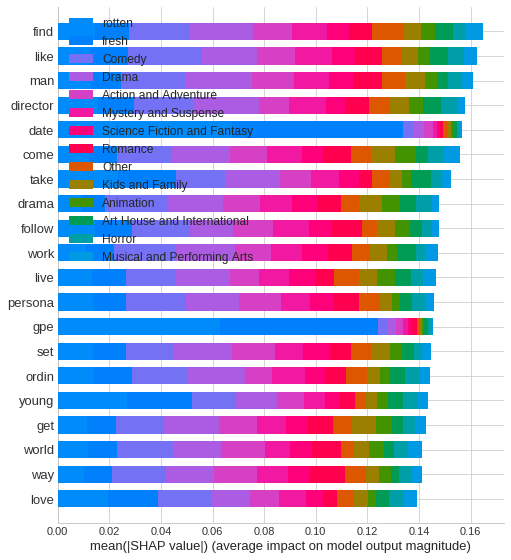

In [77]:
shap.summary_plot(shap_values, 
                  feature_names = list(num2word.values()), class_names=y_df.columns)

Action and Adventure


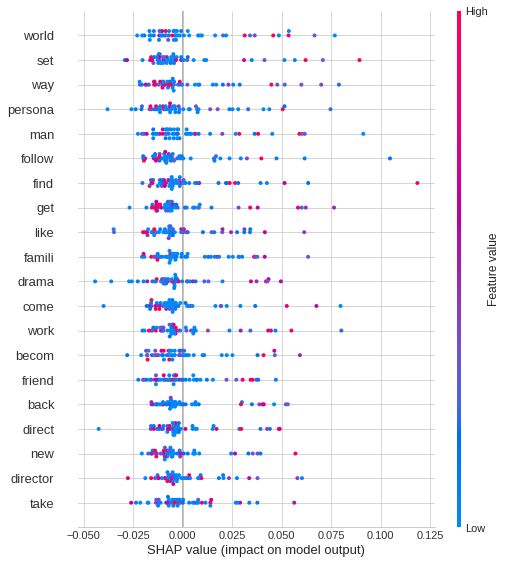

Animation


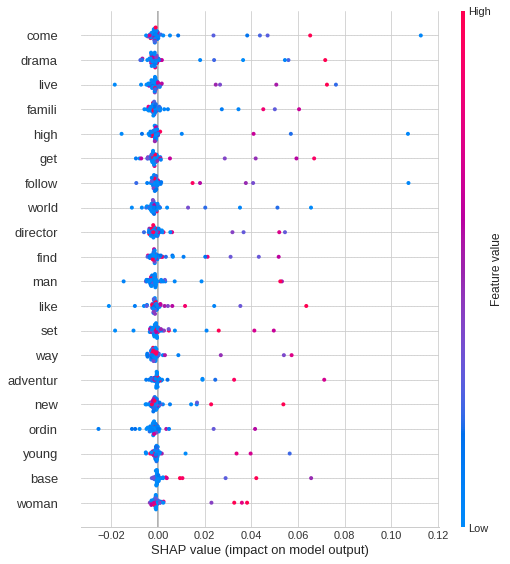

Art House and International


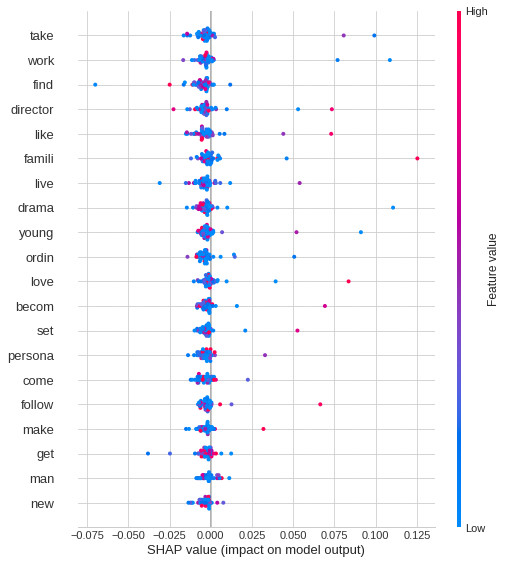

Comedy


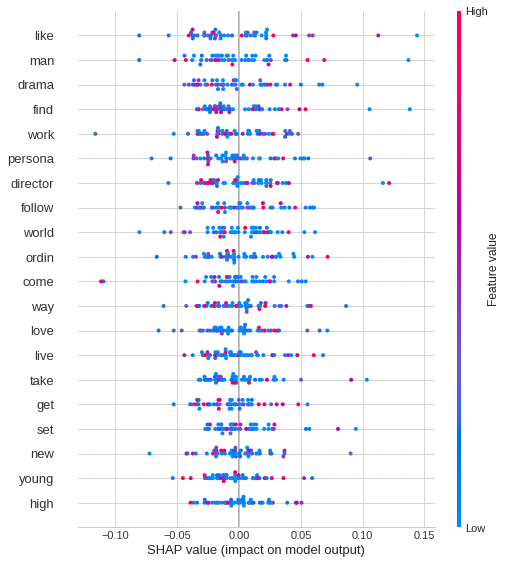

Drama


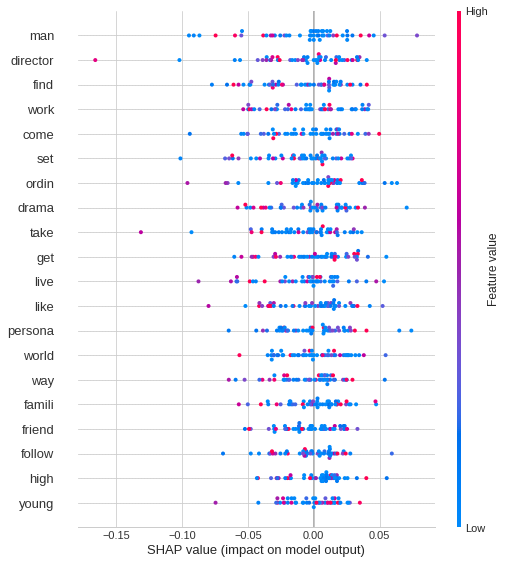

Horror


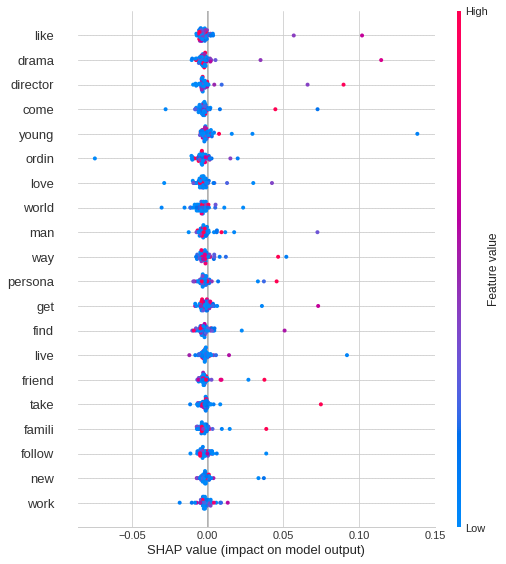

Kids and Family


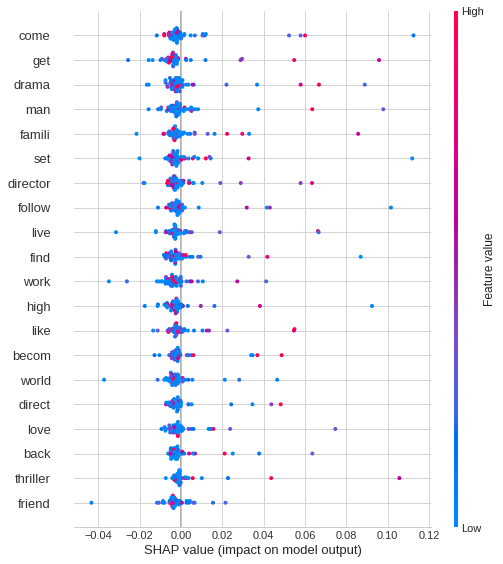

Musical and Performing Arts


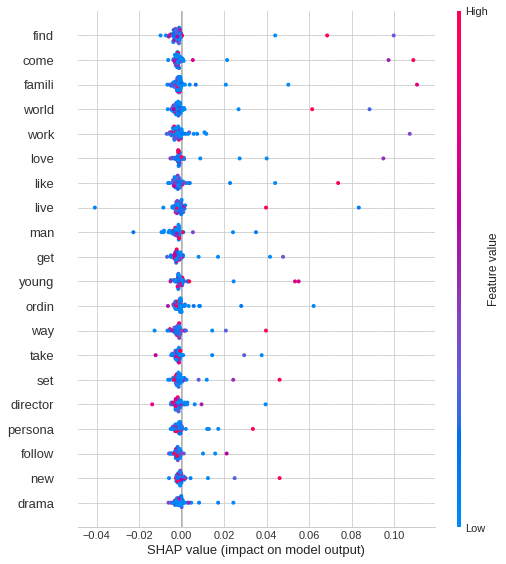

Mystery and Suspense


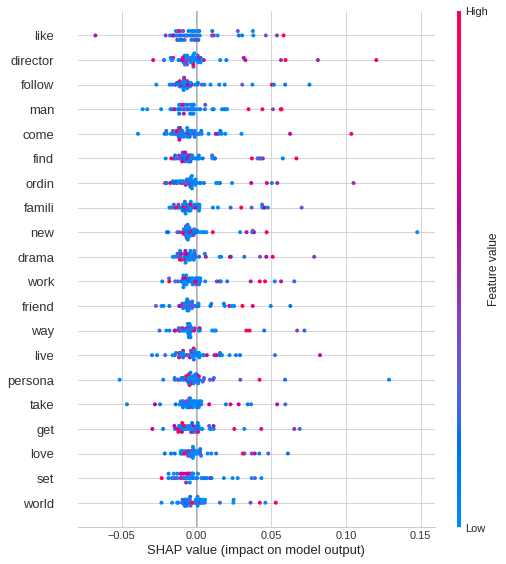

Romance


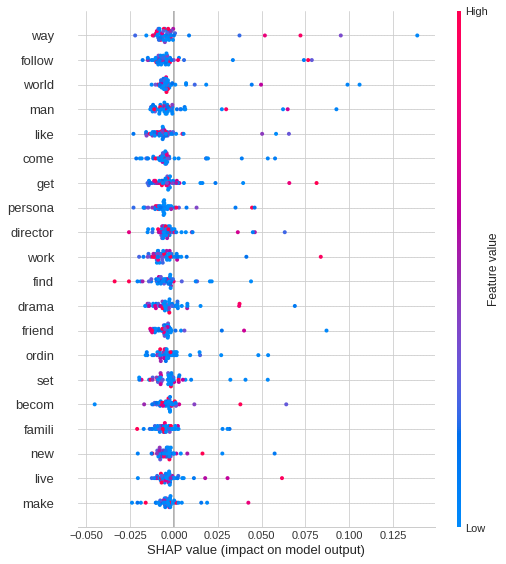

Science Fiction and Fantasy


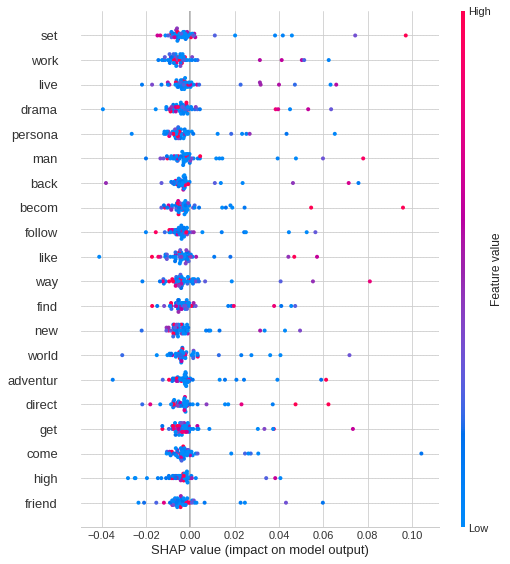

fresh


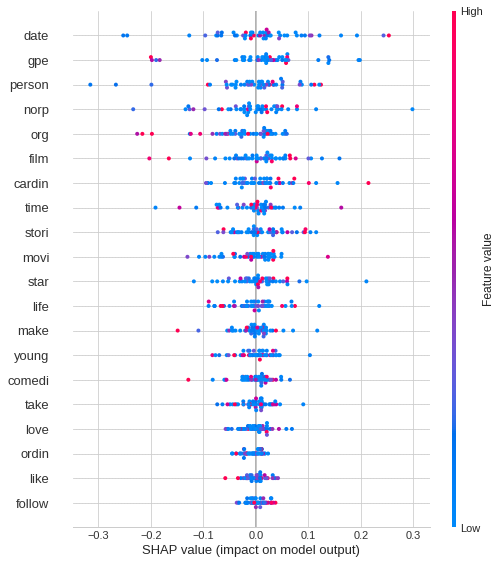

rotten


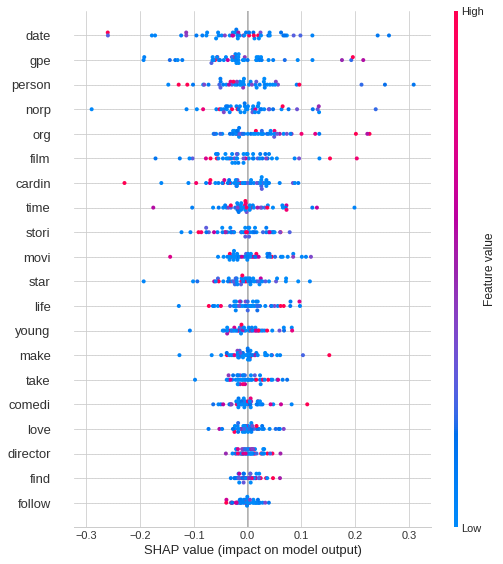

Other


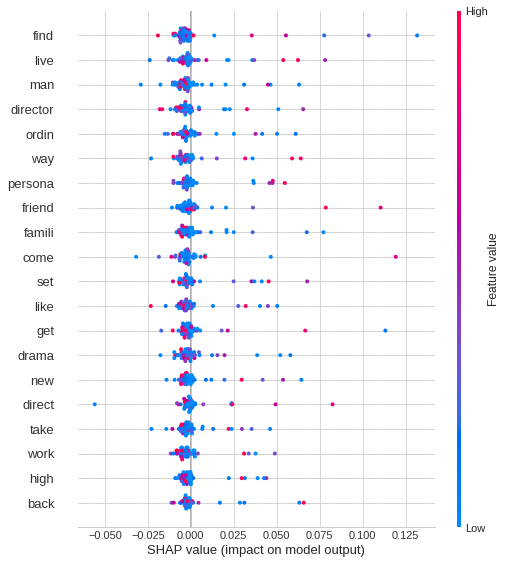

In [78]:
for i in range(14):
    print(y_df.columns[i])
    shap.summary_plot(shap_vals[i], X_test_pad[:num_explanations], feature_names=list(num2word.values()))

In [79]:
X_train_pad[0].shape

(579,)

In [80]:
X_train_pad[0]

array([2228,   95,   47, 2061,  336,   15,  187,  215, 2050, 5650,  142,
         41, 5151,  515,  294, 1813, 2731,  199,   39,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [81]:
word_lookup = {v:k for k,v in tokenizer.word_index.items()}

In [82]:
word_lookup[2228]

'refresh'

In [83]:
word_lookup[95]

'see'